# 言語処理100本ノック 2020 (Rev 2)


## 第4章: 形態素解析

In [8]:
!head nlp100.github.io/data/neko.txt


In [11]:
#!mecab -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd nlp100.github.io/data/neko.txt >neko.txt.mecab
!mecab nlp100.github.io/data/neko.txt >neko.txt.mecab

In [12]:
!head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ


### 30. 形態素解析結果の読み込み

In [1]:
# https://taku910.github.io/mecab/
# https://analytics-note.xyz/programming/mecab-default-format/
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

import re
lines = []
sno = 0
with open('neko.txt.mecab') as f:
  for i,line in enumerate(f):
#    if i > 20:
#      break
    if re.search(r"^EOS$",line):
      sno += 1
      continue
    if re.search(r"^$",line):
      continue
    s = line.split('\t')
    if re.search(r"^$",s[0]):
      continue
    t = s[1].split(',')
    lines.append({
      "sno": sno,
      "surface": s[0],
      "base": t[6],
      "pos": t[0],
      "pos1": t[1],
    })

lines[0:10]


[{'sno': 0, 'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'sno': 2, 'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'sno': 2, 'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'sno': 2, 'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'sno': 2, 'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'sno': 2, 'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'sno': 2, 'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'sno': 2, 'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'sno': 3, 'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'sno': 3, 'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}]


### 31. 動詞

In [2]:
{l["surface"] for l in lines if l["pos"] == "動詞"}

{'弁ずる',
 '連ね',
 '片付け',
 '弾き',
 '担ぎ出す',
 '浚い',
 '見る',
 '見付かる',
 '組み合せ',
 '翳す',
 '振り翳し',
 '開き直っ',
 '知ろ',
 '縮める',
 '舐める',
 '生やし',
 'すまさ',
 '食いつく',
 '求む',
 '具え',
 '春めい',
 '可愛がら',
 'まくっ',
 '向う',
 '敬い',
 '払う',
 '行こ',
 '飼わ',
 'からかっ',
 '引き続い',
 'まぜ返す',
 '捕れん',
 '告げる',
 '抜き取っ',
 '弾い',
 '起きる',
 'おこ',
 '及ぼす',
 '休める',
 '並みいる',
 'いれ',
 '据わっ',
 '上っ',
 '従え',
 '利か',
 '暮す',
 'ぶら下げる',
 'おどり',
 'ころがる',
 '為す',
 '詰め込む',
 '出掛ける',
 '追っ',
 '曝し',
 '釣ら',
 '通り抜ける',
 '押し出し',
 '洩らす',
 '侮る',
 '煎じ',
 'ぬい',
 '儲け',
 '自惚れ',
 '好い',
 '学ぶ',
 'ちまい',
 '並べる',
 '踏み込む',
 '醒ます',
 '見せ',
 '支え',
 '問う',
 '作る',
 '担い',
 '腐る',
 '転がる',
 'くっ',
 '見下ろし',
 '抛り出し',
 '誓っ',
 '生れ',
 'はおり',
 'かおっ',
 '焦',
 '律す',
 '飛び込ん',
 '喜ぶ',
 '呈し',
 'かたちづくっ',
 'まわる',
 'ごろつい',
 'あきらめ',
 '知れ渡っ',
 '欠く',
 '真似',
 '破ら',
 '食える',
 'いけ',
 '捕っ',
 '仰向い',
 '蒔き',
 '終',
 '敗れ',
 '心得',
 'あぶら',
 'そい',
 '掛る',
 '這入れ',
 '打ち抜い',
 '売り飛ばし',
 'ねじ上げ',
 '困ら',
 '仕損じ',
 'かね',
 'おる',
 'いり',
 'つけ',
 '登り',
 '這出',
 '去っ',
 'やき',
 '遊ぶ',
 '譲る',
 '結ん',
 '頑張っ',
 '進ん',
 '揉み',
 '退',
 'かかり',
 '届け出る


### 32. 動詞の基本形

In [3]:
{l["base"] for l in lines if l["pos"] == "動詞"}

{'弁ずる',
 '担ぎ出す',
 '見る',
 '見付かる',
 '翳す',
 'ぬくもる',
 '制す',
 'とぶ',
 '拗じる',
 '縮める',
 '舐める',
 '食いつく',
 '求む',
 '湧く',
 '向う',
 '払う',
 '奮う',
 '舞い戻る',
 '押し返す',
 '振り撒く',
 'まぜ返す',
 '告げる',
 'ききつける',
 '這出る',
 '並みいる',
 '起きる',
 '及ぼす',
 '休める',
 '見縊る',
 'なく',
 '暮す',
 'ぶら下げる',
 'ころがる',
 '滑らす',
 '為す',
 '詰め込む',
 '出掛ける',
 '己惚れる',
 '敷く',
 '図抜ける',
 '通り抜ける',
 '侮る',
 '洩らす',
 '言い付ける',
 '取り合せる',
 '学ぶ',
 'もす',
 '括る',
 '映じる',
 '並べる',
 '踏み込む',
 '醒ます',
 '問う',
 'おどろかす',
 '作る',
 '転がる',
 '腐る',
 'しつくす',
 '劃する',
 '律す',
 'うける',
 '附ける',
 '喜ぶ',
 'まわる',
 '知らす',
 '欠く',
 '後れる',
 'かじる',
 'あずかる',
 '立ち去る',
 '食える',
 '産まれる',
 '舞う',
 '組む',
 'つまる',
 '見上ぐ',
 '横切る',
 '掛る',
 'おる',
 '変じる',
 'もうす',
 'ごろつく',
 '追い詰める',
 '連れ出す',
 '遊ぶ',
 '譲る',
 '分捕る',
 '届け出る',
 '吹く',
 'はめる',
 '注ぐ',
 '逃げ惑う',
 '仰せつける',
 '叩き込む',
 '衝く',
 '儲かる',
 'える',
 '病む',
 '取り囲む',
 'つぶやく',
 '取り去る',
 'おれる',
 'よす',
 '罷る',
 'いむ',
 '射る',
 '冷やかす',
 '纏まる',
 'なぐりつける',
 '抜ける',
 '張り切れる',
 'かく',
 '認める',
 '洩る',
 '気が付く',
 '打ち落す',
 '投ずる',
 '撮る',
 '徹る',
 '捕れる',
 '混ぜる',
 '弾ける',
 'はみ出す',
 '名乗る'


### 33. 「AのB」

In [4]:
anob = set()
for i,l in enumerate(lines):
  if l["surface"] != "の":
    continue
  if i < 1:
    continue
  A = lines[i-1]
  B = lines[i+1]
  if A["pos"] != "名詞" or B["pos"] != "名詞":
    continue
  anob.add("{}{}{}({}-{}-{})".format(A["surface"],l["surface"],B["surface"],A["pos"],l["pos"],B["pos"]))
anob

{'壁の半ば(名詞-助詞-名詞)',
 '細君の襲撃(名詞-助詞-名詞)',
 '今年の気候(名詞-助詞-名詞)',
 '君の論文(名詞-助詞-名詞)',
 '自然の力(名詞-助詞-名詞)',
 '線の区域(名詞-助詞-名詞)',
 '天下の秀才(名詞-助詞-名詞)',
 '秋の灯(名詞-助詞-名詞)',
 '鴨のロース(名詞-助詞-名詞)',
 '人間の方(名詞-助詞-名詞)',
 '金田の内幕(名詞-助詞-名詞)',
 '会社の役員(名詞-助詞-名詞)',
 '町人の区別(名詞-助詞-名詞)',
 '鉢の中(名詞-助詞-名詞)',
 '嬢のため(名詞-助詞-名詞)',
 '車屋の黒(名詞-助詞-名詞)',
 '唐紙の傍(名詞-助詞-名詞)',
 '開化の高潮(名詞-助詞-名詞)',
 '肝心の対象(名詞-助詞-名詞)',
 '学校の事(名詞-助詞-名詞)',
 'こっちの方(名詞-助詞-名詞)',
 'Agnodiceの逸話(名詞-助詞-名詞)',
 '堤の分署(名詞-助詞-名詞)',
 '唯一の楽(名詞-助詞-名詞)',
 '供の世話(名詞-助詞-名詞)',
 '去年の臭気(名詞-助詞-名詞)',
 '一の真理(名詞-助詞-名詞)',
 '咄嗟の際(名詞-助詞-名詞)',
 '蜂の陣立て(名詞-助詞-名詞)',
 '今の喧嘩(名詞-助詞-名詞)',
 '不可思議の太平(名詞-助詞-名詞)',
 '帝都の中心(名詞-助詞-名詞)',
 '隣家の三(名詞-助詞-名詞)',
 '向うの戸棚(名詞-助詞-名詞)',
 '煩悩の迷(名詞-助詞-名詞)',
 '以後の猫(名詞-助詞-名詞)',
 '桶の方(名詞-助詞-名詞)',
 '囲炉裏の傍(名詞-助詞-名詞)',
 'シャンパンの三々九度(名詞-助詞-名詞)',
 '迷亭の返答(名詞-助詞-名詞)',
 '迷亭の旧悪(名詞-助詞-名詞)',
 '先の方(名詞-助詞-名詞)',
 '様の道具(名詞-助詞-名詞)',
 '泥棒の方(名詞-助詞-名詞)',
 '顔の上(名詞-助詞-名詞)',
 '傚の能力(名詞-助詞-名詞)',
 '吾輩の耳(名詞-助詞-名詞)',
 '吶喊の声(名詞-助詞-名詞)',
 '内の時(名詞-助詞-名詞)',
 'シャツの腕(名詞-助詞-名詞)',
 '見ず知らずの人(名詞-助詞-名詞)',



### 34. 名詞の連接

In [5]:
#w = ""
w = []
r = set()
for (i,l) in enumerate(lines):
  if l["pos"] == "名詞":
#    w += l["surface"]
    w.append(l)
  else:
    if len(w) > 1:
      s = []
      p = []
      for w2 in w:
        s.append(w2["surface"])
        p.append(w2["pos"])
      r.add("{}({})".format("-".join(s),"-".join(p)))
    w = []
r

{'袂-時計(名詞-名詞)',
 'せんだって-妙(名詞-名詞)',
 '河豚-提灯(名詞-名詞)',
 '武-右-衛門-君(名詞-名詞-名詞-名詞)',
 '——」-迷亭(名詞-名詞)',
 '猫-一疋(名詞-名詞)',
 '君-何(名詞-名詞)',
 '艶-書(名詞-名詞)',
 '——-なあに-君(名詞-名詞-名詞)',
 '力学-的(名詞-名詞)',
 '野猪-的-本領(名詞-名詞-名詞)',
 'きい-きい(名詞-名詞)',
 '一-目打ち-たまえ(名詞-名詞-名詞)',
 '盗難-品(名詞-名詞)',
 '——-博士(名詞-名詞)',
 '宿場-女郎(名詞-名詞)',
 '仕合せ-者(名詞-名詞)',
 '一-隊(名詞-名詞)',
 '内-御礼(名詞-名詞)',
 '昨日-あたり(名詞-名詞)',
 '逆上-的-敏腕(名詞-名詞-名詞)',
 '乱暴-者(名詞-名詞)',
 '夜-十-一-時-頃(名詞-名詞-名詞-名詞-名詞)',
 '不動-智-神妙-録(名詞-名詞-名詞-名詞)',
 'いや-日(名詞-名詞)',
 '樽-木(名詞-名詞)',
 '蝉-学-上-忽(名詞-名詞-名詞-名詞)',
 '猫又-殿(名詞-名詞)',
 '賞-め(名詞-名詞)',
 '牛-鉄心(名詞-名詞)',
 '人間-自身(名詞-名詞)',
 '命令-中(名詞-名詞)',
 '君-独-仙(名詞-名詞-名詞)',
 '一-位(名詞-名詞)',
 '誂-ら(名詞-名詞)',
 '金-さん(名詞-名詞)',
 '百-二-十(名詞-名詞-名詞)',
 '箆-棒(名詞-名詞)',
 '前後-不覚(名詞-名詞)',
 '聊-感謝(名詞-名詞)',
 'リー-ドル-専門(名詞-名詞-名詞)',
 '夏-さん(名詞-名詞)',
 '客-様(名詞-名詞)',
 '何-物-たる(名詞-名詞-名詞)',
 '出-掛(名詞-名詞)',
 '大概-ここ(名詞-名詞)',
 '灯-自ら(名詞-名詞)',
 '形式-論理-学(名詞-名詞-名詞)',
 '充分-本心(名詞-名詞)',
 '二-三-歩(名詞-名詞-名詞)',
 '神田-辺(名詞-名詞)',
 '立て-損(名詞-名詞)',
 '毎日-喧嘩(名詞-名詞)',
 '奥さん-意地張り(名詞-名詞)',
 '大方-居眠り(名詞-名詞)',
 '毎日-毎


### 35. 単語の出現頻度

In [6]:
import collections
words = [ l["surface"] for l in lines ]
#counts = {}

print(len(words))

c = collections.Counter(words).most_common()

c


206338


[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2390),
 ('だ', 2363),
 ('し', 2322),
 ('から', 2032),
 ('ある', 1728),
 ('な', 1613),
 ('ん', 1568),
 ('か', 1530),
 ('いる', 1249),
 ('事', 1207),
 ('へ', 1034),
 ('う', 992),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('なる', 531),
 ('さ', 514),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 478),
 ('ます', 458),
 ('じゃ', 448),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('なっ', 404),
 ('それ', 381),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('でも', 346),
 ('時', 345),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('三', 319),
 ('——', 319),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('二', 303),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒


### 36. 頻度上位10語

['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']
[9194, 7486, 6868, 6772, 6420, 6243, 6071, 5508, 5337, 3988]


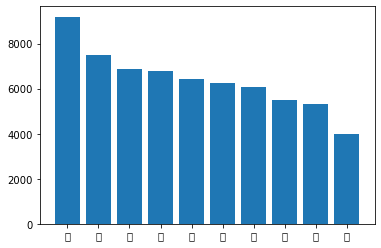

In [10]:
import matplotlib.pyplot as plt

top = c[0:10]
x = [t[0] for t in top]
y = [t[1] for t in top]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.bar( x, y, align="center")
plt.xticks(ticks=range(0,len(x)),labels=x)
print(x)
print(y)



### 37. 「猫」と共起頻度の高い上位10語

[('の', 391), ('は', 272), ('、', 252), ('に', 250), ('を', 232), ('て', 229), ('。', 209), ('と', 202), ('が', 180), ('で', 170)]


<BarContainer object of 10 artists>

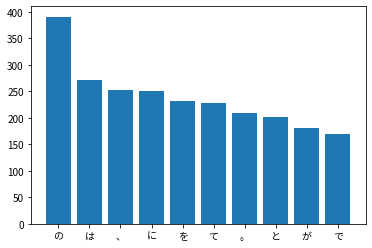

In [107]:
snos = { l["sno"] for l in lines if l["surface"]=="猫"}
len(snos)

words = []
for sno in snos:
  words += [l["surface"] for l in lines if l["sno"]==sno and l["surface"] != "猫"]
#for l in lines:

cat = collections.Counter(words).most_common()
cattop = c[0:10]
print(cattop)

x = [t[0] for t in cattop]
y = [t[1] for t in cattop]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.bar( x, y, align="center")



### 38. ヒストグラム
